<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Breast_cancer_wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/cancer.csv")

In [9]:
df_new = df.drop(['id','Unnamed: 32'],axis =1)

In [12]:
df_new['diagnosis'] = LabelEncoder().fit_transform(df_new['diagnosis'])

In [15]:
X = df_new.drop(['diagnosis'],axis =1)
y = df_new['diagnosis']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

[2.661e+02 9.390e+01 2.011e+03 5.399e+04 1.499e-01 5.403e+00 1.971e+01
 1.054e+01 2.574e-01 7.431e-05 3.468e+01 9.794e-03 2.506e+02 8.759e+03
 3.266e-03 6.138e-01 1.045e+00 3.052e-01 8.036e-05 6.371e-03 4.917e+02
 1.744e+02 3.665e+03 1.126e+05 3.974e-01 1.931e+01 3.952e+01 1.349e+01
 1.299e+00 2.315e-01]


Text(0, 0.5, 'Features name')

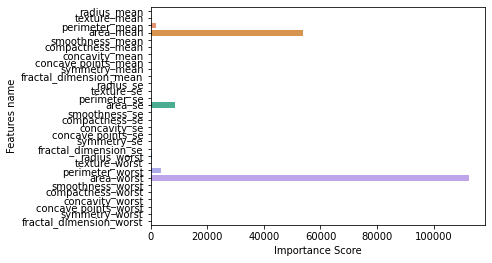

In [17]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_
print(score)
Y = X.columns
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [18]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [19]:
rf.feature_importances_

array([0.057, 0.014, 0.042, 0.072, 0.006, 0.014, 0.043, 0.077, 0.005,
       0.003, 0.015, 0.004, 0.016, 0.042, 0.004, 0.005, 0.009, 0.005,
       0.004, 0.004, 0.07 , 0.016, 0.127, 0.122, 0.013, 0.011, 0.048,
       0.137, 0.011, 0.005])

Text(0.5, 0, 'Feature Importance')

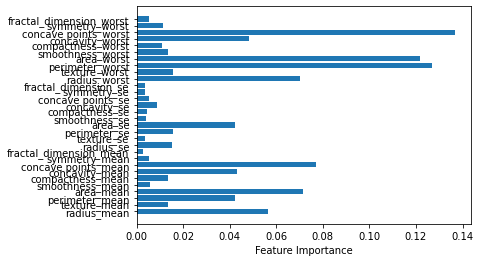

In [20]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

Text(0.5, 0, 'Feature Importance MEAN')

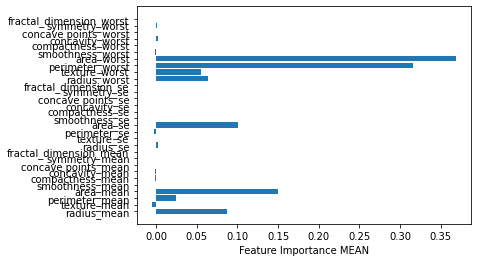

In [22]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

Text(0.5, 0, 'Feature Importance STD')

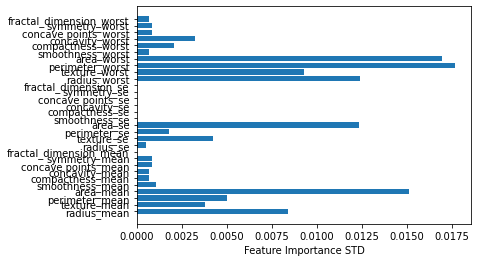

In [23]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

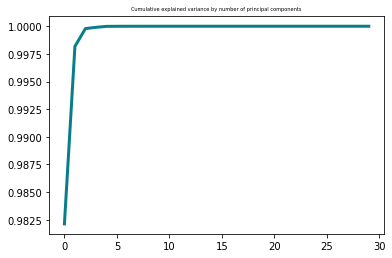

In [24]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [25]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
radius_mean,3.401069,0.794564,-0.336900,-0.244697,0.238787,-0.223405,0.050795,0.042094,-0.140243,0.041949,...,5.339215e-04,-5.774358e-05,-5.257013e-05,1.399863e-04,3.187232e-06,-7.624962e-06,-4.619805e-06,-5.492367e-06,6.683785e-07,5.844152e-08
texture_mean,1.478352,-0.249203,-0.194294,-2.773644,-2.673829,-0.437970,-1.048699,0.040318,0.003300,0.020308,...,-4.443308e-06,3.166811e-06,2.796134e-06,8.931711e-08,1.918707e-06,-2.300430e-06,-3.491139e-07,-2.199705e-07,-2.118372e-07,1.557495e-08
perimeter_mean,23.484303,5.375312,-1.978402,-2.329584,2.079495,-1.431771,0.313419,-0.050448,0.052086,-0.026153,...,-9.148807e-05,2.145163e-05,1.114815e-05,-1.705075e-05,1.607662e-07,6.096182e-07,-4.193885e-07,8.577445e-07,2.043893e-07,-5.695176e-08
area_mean,347.336162,73.821464,-0.916978,0.276782,-0.304596,0.088505,-0.013189,0.001741,-0.001499,0.000577,...,6.706159e-07,-5.585378e-07,-5.666946e-08,-1.493787e-07,-6.742606e-08,-1.831391e-08,5.434870e-08,1.681308e-09,-1.862294e-08,1.431249e-09
smoothness_mean,0.002801,-0.001179,0.001960,-0.002361,0.003576,-0.000507,0.002237,-0.002471,0.003352,-0.001670,...,4.357626e-04,-9.422762e-04,8.303950e-04,-3.665742e-03,-1.764938e-03,-7.999106e-04,1.033634e-04,-5.295373e-05,1.357229e-04,-1.192201e-06


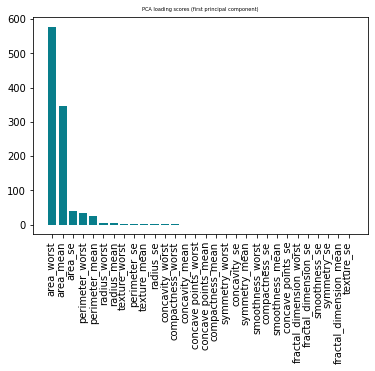

In [26]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [27]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

array([27, 22, 20,  7,  2,  0, 23,  3,  6, 26,  5, 25, 10, 12, 13, 21, 24,
       28,  1, 17,  4,  8, 29, 15, 16, 19, 14, 11,  9, 18])

In [28]:
best_features_fscore = df.columns[fs_indices_fscore].values
print(best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print(feature_importances_fscore)

['compactness_worst' 'radius_worst' 'symmetry_se' 'compactness_mean'
 'radius_mean' 'id' 'texture_worst' 'texture_mean' 'smoothness_mean'
 'smoothness_worst' 'area_mean' 'area_worst' 'symmetry_mean' 'radius_se'
 'texture_se' 'fractal_dimension_se' 'perimeter_worst' 'concavity_worst'
 'diagnosis' 'compactness_se' 'perimeter_mean' 'concavity_mean'
 'concave points_worst' 'area_se' 'smoothness_se' 'concave points_se'
 'perimeter_se' 'fractal_dimension_mean' 'concave points_mean'
 'concavity_se']
[8.773e+02 8.012e+02 7.792e+02 7.755e+02 6.376e+02 5.945e+02 5.919e+02
 5.197e+02 4.757e+02 3.879e+02 2.870e+02 2.834e+02 2.416e+02 2.286e+02
 2.154e+02 1.292e+02 1.109e+02 1.061e+02 1.042e+02 9.818e+01 6.970e+01
 5.777e+01 5.691e+01 4.808e+01 3.128e+01 2.040e+00 1.967e+00 4.178e-01
 3.129e-01 2.101e-02]


Text(0, 0.5, 'Features')

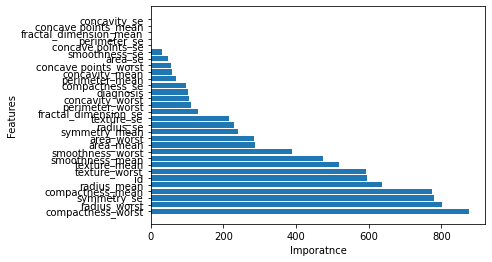

In [29]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [30]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['radius_worst', 'texture_worst', 'symmetry_se', 'compactness_mean',
       'compactness_worst', 'radius_mean', 'smoothness_mean',
       'texture_mean', 'id', 'texture_se', 'smoothness_worst',
       'radius_se', 'symmetry_mean', 'area_mean', 'area_worst',
       'smoothness_se', 'fractal_dimension_se', 'compactness_se',
       'concavity_worst', 'diagnosis', 'perimeter_worst',
       'perimeter_mean', 'area_se', 'concavity_mean',
       'concave points_worst', 'concave points_se', 'concavity_se',
       'concave points_mean', 'perimeter_se', 'fractal_dimension_mean'],
      dtype=object)

In [31]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.475, 0.468, 0.455, 0.441, 0.44 , 0.412, 0.386, 0.374, 0.358,
       0.338, 0.327, 0.269, 0.247, 0.232, 0.232, 0.134, 0.127, 0.125,
       0.101, 0.1  , 0.097, 0.067, 0.061, 0.058, 0.05 , 0.041, 0.036,
       0.018, 0.003, 0.   ])

Text(0, 0.5, 'Features')

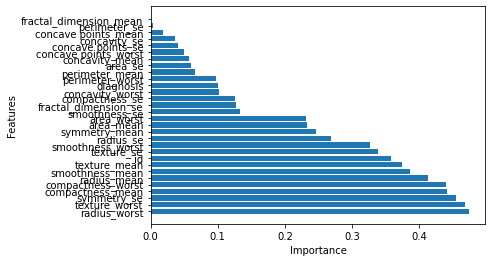

In [32]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [ ]:
df_corr = df_new.corr()
df_corr

In [35]:
print(abs(df_corr['diagnosis']))

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean     0.012838
radius_se                  0.567134
texture_se                 0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se              0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se                0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0